In [33]:
import numpy as np
import sympy as sy

def solve_func(f,s,e):

  x = (s+e)/2
  
  # If f(s) = 0
  if f(s) == 0:
    return s
  # If f(e) = 0 
  if f(e) == 0:
    return e

  # If f(x) = 0
  if f(x) == 0:
    return round(x,8)
  elif (e-s) < 0.00000001:
    return round(x,8)
  else :
    if ((f(s) < 0) and (f(x) > 0) or (f(s) > 0) and (f(x) < 0)):
      return solve_func(f,s,x)
    elif ((f(e) < 0) and (f(x) > 0) or (f(e) > 0) and (f(x) < 0)):
      return solve_func(f,x,e)


In [34]:
#Problem 1
#Write code to approximate the solution to x5 + 2x3 − x − 1 = 0 in [0,1] to 6 decimal places.

x = sy.symbols("x")
expr = x**5 + 2*x**3 - x -1
f = sy.lambdify(x,expr)
f(1)

print(round(solve_func(f,0,1),8))



0.87838864


In [35]:
#Problem 2

coef = [-1,-1,0,2,0,1] #input the coefficent


def Solver(coef):
  x = sy.symbols("x")
  expr = 0
  for i in range(len(coef)):
    expr += coef[len(coef) - 1 - i]*x**(len(coef) - 1 - i)
  f = sy.lambdify(x,expr)
  
  # Find a and b
  ak_1 = 0
  for i in range(len(coef)-1):
    ak_1 += abs(coef[i])
  b = 1 + ak_1 / abs(coef[-1])
  a = -1 - ak_1 / abs(coef[-1])

  if coef[-1]<0:
    a, b = b, a

  return solve_func(f,a,b)
  
# a) 4 − 4x + 3x**2 − 3x**3 − x**4 + x**5
print("a) " + str(Solver([4,-4,3,-3,-1,1])))
# b) −8000x + 800040x2 − 4003.8x3 − 19.981x4 + 0.1x5
print("b) " + str(Solver([0,-8000,800040,4003.8,-19.981,0.1])))
# c) −2519.48 − 251915x − 12594100x2 + 165746x3 − 714.13x4 + x5
print("c) " + str(Solver([-2519.48,-251915,-12594100,165746,-714.13,1])))
# d) −0.1 − x + 1000x2 + 10000x3 + 0.1x4 + x5
print("d) " + str(Solver([-0.1,-1,1000,10000,0.1,1])))

a) -2.0
b) 0.0
c) 314.14323791
d) 0.01


In [36]:
def Newton_support(expr,x_0):
  x = sy.symbols("x")
  f = sy.lambdify(x,expr)
  
  d_expr = sy.diff(expr, x)
  d_f = sy.lambdify(x,d_expr)

  x_1 = x_0 - f(x_0)/d_f(x_0)

  return x_1

def Newton(expr,x_0):
  x_1 = Newton_support(expr,x_0)

  if abs(x_0 - x_1) < 0.0000001:
    return x_1
  else:
    return Newton(expr,x_1)


In [37]:
#Problem 3

x = sy.symbols("x") 
expr = x**5 + 2*x**3 - x - 1

x_0 = 0.1

Newton(expr,x_0)


0.8783886413483404

In [38]:
#Problem 4
def Newton_support(expr,x_0):
  x = sy.symbols("x")
  f = sy.lambdify(x,expr)
  
  d_expr = sy.diff(expr, x)
  d_f = sy.lambdify(x,d_expr)

  x_1 = x_0 - f(x_0)/d_f(x_0)

  return x_1

def Newton(expr,x_0):
  x_1 = Newton_support(expr,x_0)

  if abs(x_0 - x_1) < 0.0000001:
    return x_1
  else:
    return Newton(expr,x_1)

x = sy.symbols("x") 
expr = x**5 + 2*x**3 - x - 1

x_0 = 0.1

Newton(expr,x_0)

0.8783886413483404

In [42]:
#Problem 5

x = sy.symbols("x") 
expr = sy.sin(x**2) + x**2 - x - 1

x_0 = -0.5

Newton(expr,x_0)

-0.5008739333981748

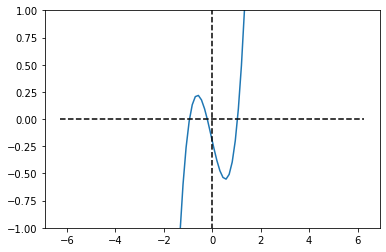

I see 3 solutions, and those are -0.938, -0.204, 1.043
Any initial value in x < -0.612 will find a solution -0.938.
Any initial value in -0.612 < x < 0.545  will find a solution -0.204.
Any initial value in 0.545 < x will find a solution 1.043.
However, if the initial value is equal to either -0.612 or 0.545, we can't find a solution.


In [70]:
#Problem 6

import matplotlib.pyplot as plt
x = sy.symbols("x") 
expr = x**3 + 0.1*x**2 - x - 0.2
f = sy.lambdify(x,expr)
x_line = np.linspace(-2*np.pi,2*np.pi,100)

plt.plot(x_line , f(x_line))
plt.plot(np.linspace(-2*np.pi,2*np.pi),np.linspace(0,0), "--k")
plt.plot(np.linspace(0,0),np.linspace(-10,10), "--k")
plt.ylim(-1,1)
plt.show()

print("I see 3 solutions, and those are -0.938, -0.204, 1.043")
print("Any initial value in x < -0.612 will find a solution -0.938.")
print("Any initial value in -0.612 < x < 0.545  will find a solution -0.204.")
print("Any initial value in 0.545 < x will find a solution 1.043.")
print("However, if the initial value is equal to either -0.612 or 0.545, we can't find a solution.")